Let's find out the number of medals by year of birth.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
medals_df = pd.read_csv('../data/tokyo-2020-olympics/medals.csv')
athletes_df = pd.read_csv('../data/tokyo-2020-olympics/athletes.csv')

Since `medals.csv` does not include the date of birth, combine `athletes.csv` and `medals.csv`.

Leave the column you need.

In [3]:
athletes_df.head()

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_m/ft,url
0,AALERUD Katrine,AALERUD K,Female,1994-12-04,VESTBY,Norway,Norway,NOR,Cycling Road,CRD,NaN,NaN,NaN,../../../en/results/cycling-road/athlete-profi...
1,ABAD Nestor,ABAD N,Male,1993-03-29,ALCOI,Spain,Spain,ESP,Artistic Gymnastics,GAR,MADRID,Spain,1.65/5'4'',../../../en/results/artistic-gymnastics/athlet...
2,ABAGNALE Giovanni,ABAGNALE G,Male,1995-01-11,GRAGNANO,Italy,Italy,ITA,Rowing,ROW,SABAUDIA,Italy,1.98/6'5'',../../../en/results/rowing/athlete-profile-n13...
3,ABALDE Alberto,ABALDE A,Male,1995-12-15,FERROL,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,2.00/6'6'',../../../en/results/basketball/athlete-profile...
4,ABALDE Tamara,ABALDE T,Female,1989-02-06,VIGO,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,1.92/6'3'',../../../en/results/basketball/athlete-profile...


In [4]:
athletes_ddf = athletes_df[['name', 'birth_date', 'country_code', 'discipline_code', 'url']].set_index('url')

In [5]:
athletes_ddf.head()

,name,birth_date,country_code,discipline_code
url,,,,
../../../en/results/cycling-road/athlete-profile-n1346266-aalerud-katrine.htm,AALERUD Katrine,1994-12-04,NOR,CRD
../../../en/results/artistic-gymnastics/athlete-profile-n1355250-abad-nestor.htm,ABAD Nestor,1993-03-29,ESP,GAR
../../../en/results/rowing/athlete-profile-n1321381-abagnale-giovanni.htm,ABAGNALE Giovanni,1995-01-11,ITA,ROW
../../../en/results/basketball/athlete-profile-n1322233-abalde-alberto.htm,ABALDE Alberto,1995-12-15,ESP,BKB
../../../en/results/basketball/athlete-profile-n1322271-abalde-tamara.htm,ABALDE Tamara,1989-02-06,ESP,BKB


In [6]:
medals_df.head()

,medal_type,medal_code,medal_date,athlete_short_name,athlete_name,athlete_sex,athlete_link,country_code,discipline_code,event,country,discipline
0,Gold Medal,1,2021-07-24 00:00:00.0,KIM JD,KIM Je Deok,X,../../../en/results/archery/athlete-profile-n1...,KOR,ARC,Mixed Team,Republic of Korea,Archery
1,Gold Medal,1,2021-07-24 00:00:00.0,AN S,AN San,X,../../../en/results/archery/athlete-profile-n1...,KOR,ARC,Mixed Team,Republic of Korea,Archery
2,Silver Medal,2,2021-07-24 00:00:00.0,SCHLOESSER G,SCHLOESSER Gabriela,X,../../../en/results/archery/athlete-profile-n1...,NED,ARC,Mixed Team,Netherlands,Archery
3,Silver Medal,2,2021-07-24 00:00:00.0,WIJLER S,WIJLER Steve,X,../../../en/results/archery/athlete-profile-n1...,NED,ARC,Mixed Team,Netherlands,Archery
4,Bronze Medal,3,2021-07-24 00:00:00.0,ALVAREZ L,ALVAREZ Luis,X,../../../en/results/archery/athlete-profile-n1...,MEX,ARC,Mixed Team,Mexico,Archery


In [7]:
medals_ddf = medals_df[['medal_code', 'athlete_link']].set_index('athlete_link')

We leave the url column because we will determine if it is the same person by the url.

In [8]:
medals_ddf.head()

,medal_code
athlete_link,
../../../en/results/archery/athlete-profile-n1440267-kim-je-deok.htm,1
../../../en/results/archery/athlete-profile-n1338248-an-san.htm,1
../../../en/results/archery/athlete-profile-n1458456-schloesser-gabriela.htm,2
../../../en/results/archery/athlete-profile-n1458465-wijler-steve.htm,2
../../../en/results/archery/athlete-profile-n1294470-alvarez-luis.htm,3


Determine if it is the same url and get the birth date of the players based on it.

In [9]:
ath_med_df = medals_ddf.merge(athletes_ddf, left_index=True, right_index=True)

In [10]:
ath_med_df.head()

,medal_code,name,birth_date,country_code,discipline_code
../../../en/results/3x3-basketball/athlete-profile-n1312756-gray-allisha.htm,1,GRAY Allisha,1995-01-12,USA,BK3
../../../en/results/3x3-basketball/athlete-profile-n1312804-plum-kelsey.htm,1,PLUM Kelsey,1994-08-24,USA,BK3
../../../en/results/3x3-basketball/athlete-profile-n1312828-dolson-stefanie.htm,1,DOLSON Stefanie,1992-01-08,USA,BK3
../../../en/results/3x3-basketball/athlete-profile-n1344600-domovic-bulut-dusan.htm,3,DOMOVIC BULUT Dusan,1985-10-23,SRB,BK3
../../../en/results/3x3-basketball/athlete-profile-n1344606-majstorovic-dejan.htm,3,MAJSTOROVIC Dejan,1988-04-22,SRB,BK3


Check for missing values.

In [11]:
ath_med_df.isnull().sum()

medal_code          0
name                0
birth_date         20
country_code        0
discipline_code     0
dtype: int64

Check for missing values.

In [12]:
is_nan = ath_med_df.isnull()
row_has_nan = is_nan.any(axis=1)
rows_with_nan = ath_med_df[row_has_nan]

In [13]:
rows_with_nan

,medal_code,name,birth_date,country_code,discipline_code
../../../en/results/artistic-gymnastics/athlete-profile-n1318236-tanigawa-wataru.htm,2,TANIGAWA Wataru,NaN,JPN,GAR
../../../en/results/artistic-gymnastics/athlete-profile-n1318259-kitazono-takeru.htm,2,KITAZONO Takeru,NaN,JPN,GAR
../../../en/results/cycling-bmx-racing/athlete-profile-n1467951-smulders-merel.htm,3,SMULDERS Merel,NaN,NED,BMX
../../../en/results/diving/athlete-profile-n1331912-palmer-krysta.htm,3,PALMER Krysta,NaN,USA,DIV
../../../en/results/diving/athlete-profile-n1350630-hausding-patrick.htm,3,HAUSDING Patrick,NaN,GER,DIV
../../../en/results/equestrian/athlete-profile-n1478360-fry-charlotte.htm,3,FRY Charlotte,NaN,GBR,EQU
../../../en/results/fencing/athlete-profile-n1351056-lembach-charlotte.htm,2,LEMBACH Charlotte,NaN,FRA,FEN
../../../en/results/handball/athlete-profile-n1367065-hansen-johan.htm,2,HANSEN Johan,NaN,DEN,HBL
../../../en/results/handball/athlete-profile-n1367088-olsen-morten.htm,2,OLSEN Morten,NaN,DEN,HBL
../../../en/results/hockey/athlete-profile-n1308685-lakra-birendra.htm,3,LAKRA Birendra,NaN,IND,HOC


Remove all missing values because there are few missing values.

In [14]:
ath_med_df_dropna = ath_med_df.dropna()

Since we got the players' birth dates, we remove the index, and add a `birth_year` column that gets only the year from `birth_date`.

In [15]:
ath_med_df_dropna.reset_index(drop=True, inplace=True)
ath_med_df_dropna['birth_year'] = ath_med_df_dropna.apply(lambda x: x['birth_date'][:4], axis=1)

C:\Users\helpi\AppData\Local\Temp/ipykernel_8328/3146272798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath_med_df_dropna['birth_year'] = ath_med_df_dropna.apply(lambda x: x['birth_date'][:4], axis=1)


In [16]:
ath_med_df_dropna

,medal_code,name,birth_date,country_code,discipline_code,birth_year
0,1,GRAY Allisha,1995-01-12,USA,BK3,1995
1,1,PLUM Kelsey,1994-08-24,USA,BK3,1994
2,1,DOLSON Stefanie,1992-01-08,USA,BK3,1992
3,3,DOMOVIC BULUT Dusan,1985-10-23,SRB,BK3,1985
4,3,MAJSTOROVIC Dejan,1988-04-22,SRB,BK3,1988
...,...,...,...,...,...,...
2376,3,ZHUMANAZAROVA Meerim,1999-11-09,KGZ,WRE,1999
2377,2,MAKHMUDOV Akzhol,1999-04-15,KGZ,WRE,1999
2378,2,KADZIMAHAMEDAU Mahamedkhabib,1994-05-26,BLR,WRE,1994
2379,3,KOLIADENKO Iryna,1998-08-28,UKR,WRE,1998


Leave only the necessary columns.

In [17]:
medal_year = ath_med_df_dropna[['medal_code', 'birth_year', 'name']]

In [18]:
medal_year

,medal_code,birth_year,name
0,1,1995,GRAY Allisha
1,1,1994,PLUM Kelsey
2,1,1992,DOLSON Stefanie
3,3,1985,DOMOVIC BULUT Dusan
4,3,1988,MAJSTOROVIC Dejan
...,...,...,...
2376,3,1999,ZHUMANAZAROVA Meerim
2377,2,1999,MAKHMUDOV Akzhol
2378,2,1994,KADZIMAHAMEDAU Mahamedkhabib
2379,3,1998,KOLIADENKO Iryna


Groupby dataframes. However, there are many years that this dataframe does not contain.

In [20]:
medal_group = medal_year.groupby(['birth_year', 'medal_code']).count().unstack()
medal_group

name            
medal_code     1     2     3
birth_year                  
1959         NaN   1.0   1.0
1963         NaN   NaN   1.0
1964         NaN   1.0   NaN
1965         NaN   1.0   NaN
1967         NaN   NaN   1.0
1968         NaN   1.0   NaN
1969         2.0   1.0   NaN
1972         1.0   1.0   NaN
1973         NaN   1.0   NaN
1975         1.0   2.0   1.0
1976         NaN   1.0   NaN
1977         NaN   1.0   1.0
1978         NaN   2.0   1.0
1979         1.0   NaN   NaN
1980         2.0   1.0   6.0
1981         5.0   2.0   3.0
1982        10.0   6.0   4.0
1983         7.0   8.0   6.0
1984         6.0  11.0  13.0
1985         9.0  12.0  15.0
1986        15.0  14.0  10.0
1987        21.0  14.0  25.0
1988        32.0  23.0  42.0
1989        37.0  36.0  33.0
1990        32.0  46.0  45.0
1991        45.0  36.0  46.0
1992        62.0  50.0  55.0
1993        59.0  66.0  55.0
1994        76.0  59.0  93.0
1995        57.0  77.0  65.0
1996        57.0  62.0  74.0
1997        68.0  75.0  82.0
1998        45.0  52.0  47.0
1999        36.0  33.0  31.0
2000        39.0  27.0  39.0
2001        23.0  16.0  24.0
2002        14.0  10.0  12.0
2003         3.0   5.0   3.0
2004         8.0   6.0   4.0
2005         2.0   2.0   1.0
2007         2.0   NaN   NaN
2008         NaN   2.0   1.0

Add the year that is not in the dataframe and change the `NaN` value to `0`.

In [27]:
medal_group.index = pd.to_datetime(medal_group.index, format="%Y")
medal_group = medal_group.reindex(pd.date_range('1958', '2010', freq='AS')).fillna(0)

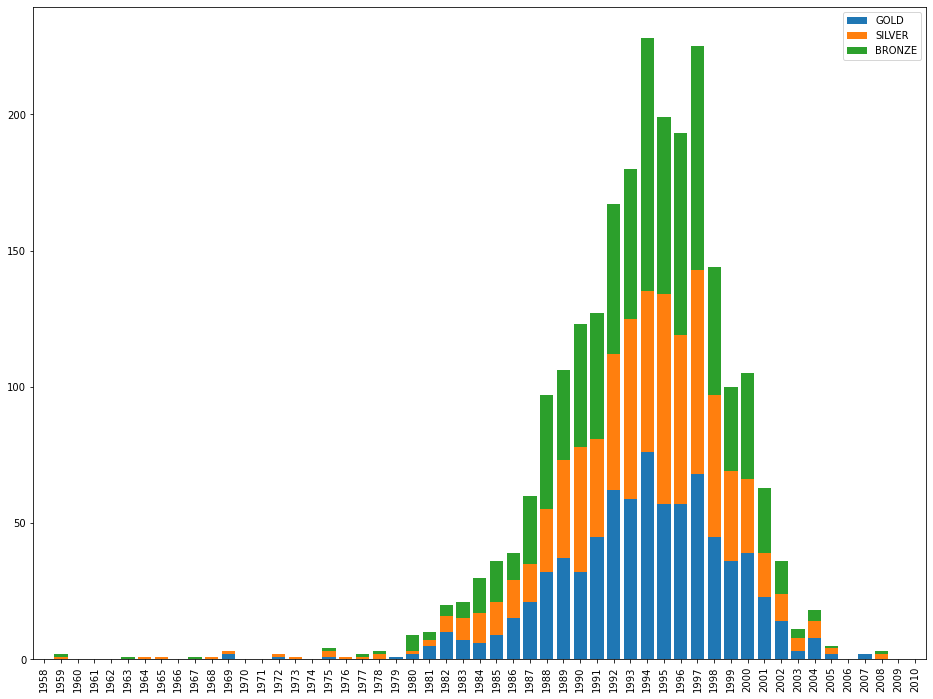

In [30]:
ax = medal_group.plot(kind='bar', y='name', stacked=True, figsize=(16, 12), width=0.8)
plt.legend(["GOLD", "SILVER", "BRONZE"])
x_labels = medal_group.index.strftime('%Y')
ax.set_xticklabels(x_labels)

plt.show()